# Módulo 6 tarefa 3

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esse arquivo.

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# %matplotlib notebook

In [5]:
sinasc = pd.read_csv('SINASC_RO_2019.CSV')
sinasc.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


#### 2) Categorize a variável APGAR5 conforme as seguintes quebras:

- 0 a 3: 'asfixia grave'
- 4 a 5: 'asfixia moderada'
- 6 a 7: 'asfixia leve'
- 8 a 10: 'normal'

In [17]:
df_apgar = pd.DataFrame({
      'nome': [
          'Ayla','Noor','Pietro','Breno','Olga',
          'Hugo','Louis'   
    ],
    'apgar_5': [0,3,7,10,5,9,1]
})
df_apgar

,nome,apgar_5
0,Ayla,0
1,Noor,3
2,Pietro,7
3,Breno,10
4,Olga,5
5,Hugo,9
6,Louis,1


In [19]:
df_apgar.loc[df_apgar['apgar_5'] <= 3, 'apgar'] = 'asfixia grave'
df_apgar.loc[(df_apgar['apgar_5'] > 4) & (df_apgar['apgar_5'] <= 5),
              'apgar'] = 'asfixia moderada'
df_apgar.loc[(df_apgar['apgar_5'] > 6) & (df_apgar['apgar_5'] <= 7),
              'apgar'] = 'asfixia leve'
df_apgar.loc[(df_apgar['apgar_5'] > 8), 'apgar'] = 'normal'

In [20]:
df_apgar

,nome,apgar_5,apgar
0,Ayla,0,asfixia grave
1,Noor,3,asfixia grave
2,Pietro,7,asfixia leve
3,Breno,10,normal
4,Olga,5,asfixia moderada
5,Hugo,9,normal
6,Louis,1,asfixia grave


#### 3) Monte um gráfico comparando a distribuição de APGAR5 por sexo para cada grupo de tempo de gestação (GESTACAO).

####  4) Monte uma tabela cruzada com APGAR5 nas colunas e GESTACAO nas linhas

In [13]:
SINASC_1 = pd.crosstab(sinasc['GESTACAO'], sinasc['APGAR5'])
SINASC_1

APGAR5,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
GESTACAO,,,,,,,,,,,
22 a 27 semanas,7,0,8,6,1,0,2,10,24,19,8
28 a 31 semanas,0,0,2,1,5,7,7,11,61,55,13
32 a 36 semanas,2,2,2,2,8,11,17,56,362,1307,465
37 a 41 semanas,5,20,3,5,7,21,45,151,1417,13565,7284
42 semanas e mais,1,0,0,0,0,1,1,5,44,423,223
Menos de 22 semanas,1,0,1,0,0,0,0,1,0,3,1


####  5) Da tabela cruzada do intem anterior, calcule os percentuais de linha. Ou seja, a distribuição da variável APGAR5 para cada classe de GESTACAO dado.

In [14]:
SINASC_1.sum(axis = 1)

GESTACAO
22 a 27 semanas           85
28 a 31 semanas          162
32 a 36 semanas         2234
37 a 41 semanas        22523
42 semanas e mais        698
Menos de 22 semanas        7
dtype: int64

####  6) Os médicos costumam classificar parto prematuro quando a gestação tem menos que 37 semanas. Faça um gráfico de barras da tabela cruzada acima e conclua se você acha que este conjunto de dados corrobora ou não com a afirmação dos médicos.

<AxesSubplot:xlabel='GESTACAO'>

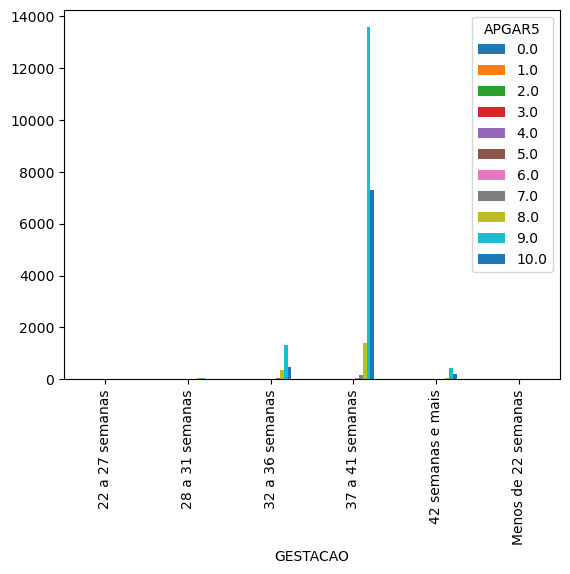

In [15]:
SINASC_1.plot.bar()

#### 7) Veja se há relação entre APGAR5 e o peso do bebê. Isso pode ser feito de diversas formas. Fique à vontade para escolher a melhor maneira na sua opinião, ou até testar mais de um dos gráficos que vimos. Fique à vontade também para consultar a documentação e utilizar algum outro recurso se achar conveniente.

In [6]:
SINASC_2 = pd.crosstab(sinasc['PESO'], sinasc['APGAR5'])
SINASC_2

APGAR5,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
PESO,,,,,,,,,,,
258,0,0,0,0,0,0,0,0,0,1,0
285,0,0,0,0,0,0,0,0,0,0,1
292,0,0,0,0,0,0,0,0,0,1,0
295,0,0,0,0,0,0,0,0,0,1,0
305,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
5190,0,0,0,0,0,0,0,0,0,1,0
5470,0,0,0,0,0,0,0,0,0,1,0
5480,0,0,0,0,0,0,0,0,0,1,0


In [7]:
SINASC_2.sum(axis = 1)

PESO
258     1
285     1
292     1
295     1
305     1
       ..
5190    1
5470    1
5480    1
5720    1
5985    1
Length: 1471, dtype: int64

<AxesSubplot:xlabel='PESO'>

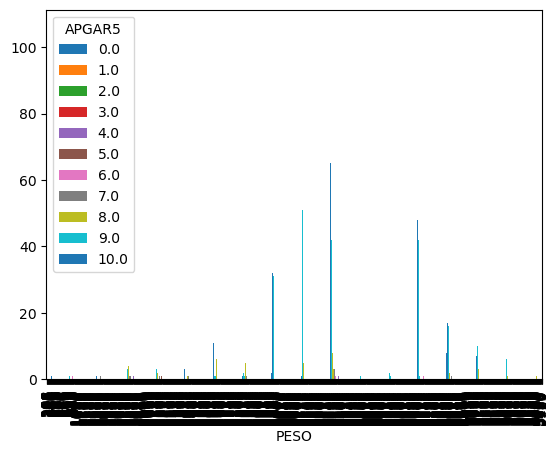

In [11]:
SINASC_2.plot.bar()